In [2]:
import numpy as np
np.set_printoptions(precision=4, suppress=True)

In [3]:
a = np.array([[1,2,3,4], [1,1,2,3], [0,1,1,0]])

In [4]:
a

array([[1, 2, 3, 4],
       [1, 1, 2, 3],
       [0, 1, 1, 0]])

In [72]:
u, s, vh = np.linalg.svd(a, full_matrices=True)

In [15]:
print(s)

[6.7509 1.1734 0.2186]


In [6]:
u.shape, s.shape, vh.shape

((3, 3), (3,), (4, 4))

In [7]:
sd = np.diag(s)

In [8]:
sd

array([[6.7509, 0.    , 0.    ],
       [0.    , 1.1734, 0.    ],
       [0.    , 0.    , 0.2186]])

In [9]:
sd.shape

(3, 3)

In [73]:
var_explained = s**2 / np.sum(s**2)
print("variance explained:", np.round(var_explained, 3)) 

variance explained: [0.97  0.029 0.001]


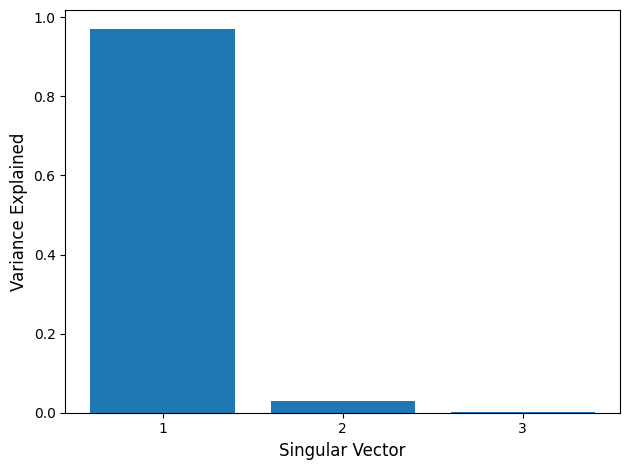

In [74]:
k_plot = min(10, len(var_explained))
x = np.arange(1, k_plot+1)
y = var_explained[:k_plot]

plt.figure()
plt.bar(x, y)
plt.xlabel('Singular Vector', fontsize=12)
plt.ylabel('Variance Explained', fontsize=12)
plt.xticks(x)
plt.tight_layout()
plt.show()

In [76]:
m, n = a.shape
sigma = np.zeros((m, n))
np.fill_diagonal(sigma, s)
print("Sigma shape", sigma.shape)

Sigma shape (3, 4)


In [77]:
A_reconstructed = u @ sigma @ vh
np.linalg.norm(a - A_reconstructed)

4.111894581708244e-15

In [78]:
k = 2

U_k = u[:, :k]
Sigma_k = sigma[:k, :k]
V_k = vh[:k, :]

A_k = U_k @ Sigma_k @ V_k
np.linalg.norm(a - A_k)

0.21864262712063645

In [10]:
b = np.zeros((3,4))

In [11]:
b[:, :-1] = u

In [12]:
b

array([[ 0.8109,  0.0934, -0.5776,  0.    ],
       [ 0.57  , -0.3493,  0.7437,  0.    ],
       [ 0.1323,  0.9324,  0.3365,  0.    ]])

In [13]:
sigma = b
sigma

array([[ 0.8109,  0.0934, -0.5776,  0.    ],
       [ 0.57  , -0.3493,  0.7437,  0.    ],
       [ 0.1323,  0.9324,  0.3365,  0.    ]])

In [14]:

print(np.dot(np.dot(u, sigma), vh))

[[-0.213   0.097  -0.116   0.9653]
 [-0.3728  0.8106  0.4377 -0.1111]
 [ 0.6945 -0.0151  0.6794  0.2364]]


In [16]:
S = [6.7509, 1.1734, 0.2186]

In [17]:
sd=np.diag(S)

In [18]:
sd

array([[6.7509, 0.    , 0.    ],
       [0.    , 1.1734, 0.    ],
       [0.    , 0.    , 0.2186]])

In [19]:
b[:, :-1] = sd
sd

array([[6.7509, 0.    , 0.    ],
       [0.    , 1.1734, 0.    ],
       [0.    , 0.    , 0.2186]])

In [26]:
sigma = b
sigma

array([[6.7509, 0.    , 0.    , 0.    ],
       [0.    , 1.1734, 0.    , 0.    ],
       [0.    , 0.    , 0.2186, 0.    ]])

In [31]:
vh

array([[ 0.2046,  0.3443,  0.5488,  0.7338],
       [-0.2181,  0.6561,  0.438 , -0.5746],
       [ 0.7598, -0.3431,  0.4167, -0.3625],
       [-0.5774, -0.5774,  0.5774,  0.    ]])

In [33]:
u

array([[ 0.8109,  0.0934, -0.5776],
       [ 0.57  , -0.3493,  0.7437],
       [ 0.1323,  0.9324,  0.3365]])

In [35]:
S = [6.7509, 1.1734, 0]

In [36]:
np.dot(u, u.T)

array([[ 1.,  0.,  0.],
       [ 0.,  1., -0.],
       [ 0., -0.,  1.]])

In [37]:
sd = np.diag(S)

In [38]:
b = np.zeros((3,4))

In [39]:
b[:, :-1] = sd

In [40]:
sigma = b

In [41]:
sigma

array([[6.7509, 0.    , 0.    , 0.    ],
       [0.    , 1.1734, 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ]])

In [43]:
print(a)
print(np.dot(np.dot(u, sigma), vh))

[[1 2 3 4]
 [1 1 2 3]
 [0 1 1 0]]
[[ 1.0959  1.9567  3.0526  3.9542]
 [ 0.8764  1.0558  1.9322  3.0589]
 [-0.0559  1.0252  0.9693  0.0267]]


In [79]:
import numpy as np
import pandas as pd
import cv2 as cv
from skimage import io
from PIL import Image
import matplotlib.pyplot as plt

In [80]:
url = './gogh.jpg'
img = cv.imread(url)

In [81]:
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_mat = np.array(list(gray_img), float)
print(img_mat.shape)

(247, 204)


(247, 204, 3)

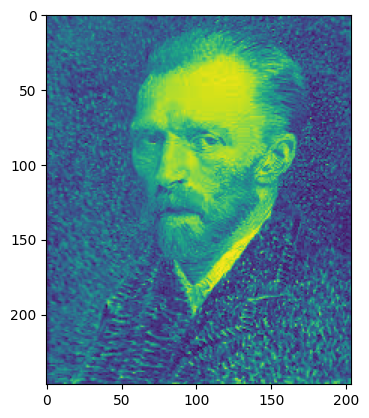

In [82]:
plt.imshow(img_mat)
img.shape

In [88]:
mean, std = img_mat.mean(), img_mat.std()
img_scaled = (img_mat - mean) / std
print("Scaled matrix shape:", img_scaled.shape,
      " mean≈%.3f std≈%.3f"%(img_scaled.mean(), img_scaled.std()))

Scaled matrix shape: (247, 204)  mean≈-0.000 std≈1.000


In [89]:
U, s, Vh = np.linalg.svd(img_scaled, full_matrices=False)
print("U:", U.shape, "s:", s.shape, "Vh:", Vh.shape)

U: (247, 204) s: (204,) Vh: (204, 204)


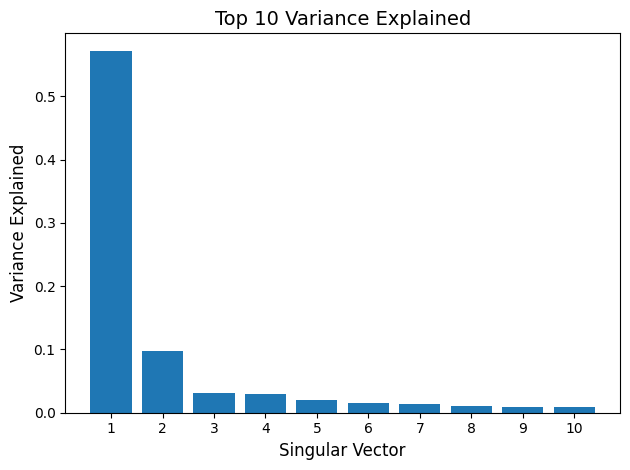

In [90]:
var_explained = s**2 / np.sum(s**2)

# Plot first 10 components (or fewer if image is small)
k_plot = min(10, len(var_explained))
x = np.arange(1, k_plot+1)
y = var_explained[:k_plot]

plt.figure()
plt.bar(x, y)
plt.xlabel('Singular Vector', fontsize=12)
plt.ylabel('Variance Explained', fontsize=12)
plt.title(f'Top {k_plot} Variance Explained', fontsize=14)
plt.xticks(x)
plt.tight_layout()
plt.show()

In [91]:
var_explained

array([0.5713, 0.0982, 0.0308, 0.029 , 0.0204, 0.0159, 0.013 , 0.0105,
       0.0091, 0.0086, 0.0078, 0.0067, 0.0062, 0.0058, 0.0056, 0.0051,
       0.0049, 0.0046, 0.0045, 0.0043, 0.0042, 0.004 , 0.0039, 0.0036,
       0.0035, 0.0034, 0.0032, 0.0031, 0.003 , 0.0029, 0.0029, 0.0027,
       0.0026, 0.0025, 0.0025, 0.0025, 0.0024, 0.0024, 0.0023, 0.0022,
       0.0022, 0.002 , 0.002 , 0.0019, 0.0019, 0.0018, 0.0018, 0.0017,
       0.0017, 0.0017, 0.0016, 0.0016, 0.0015, 0.0015, 0.0015, 0.0014,
       0.0013, 0.0013, 0.0013, 0.0013, 0.0012, 0.0012, 0.0012, 0.0012,
       0.0011, 0.0011, 0.0011, 0.001 , 0.001 , 0.001 , 0.0009, 0.0009,
       0.0009, 0.0009, 0.0009, 0.0008, 0.0008, 0.0008, 0.0008, 0.0007,
       0.0007, 0.0007, 0.0007, 0.0007, 0.0006, 0.0006, 0.0006, 0.0006,
       0.0006, 0.0006, 0.0006, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005,
       0.0005, 0.0005, 0.0005, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004,
       0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0003, 0.0003,
      

In [92]:
k = 5  # choose your # of components

U_k   = U[:, :k]
S_k   = np.diag(s[:k])
Vh_k  = Vh[:k, :]

recon = U_k @ S_k @ Vh_k
# Re-scale back to original grayscale range (optional)
recon_img = recon * std + mean

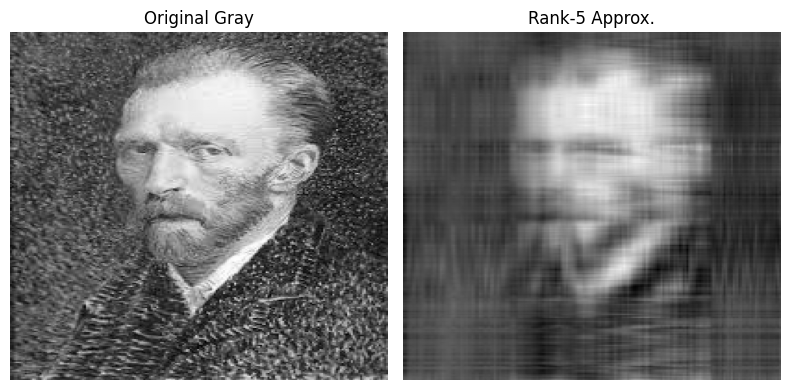

In [93]:
fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].imshow(img_mat, cmap='gray', aspect='auto')
axes[0].set_title("Original Gray")
axes[0].axis('off')

axes[1].imshow(recon_img, cmap='gray', aspect='auto')
axes[1].set_title(f"Rank-{k} Approx.")
axes[1].axis('off')

plt.tight_layout()
plt.show()